<a href="https://colab.research.google.com/github/junghyeon0114/deep_tensorflow/blob/main/ch4_1~3__tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pg. 142~181

01 합성곱 신경망

데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용됨.

ex) 이미지 분류, 객체 탐지, 스타일 전이 등

1-1. 이미지 표현

이미지를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함.


1-2 합성곱

일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법.

합성곱 연산을 통해서 추출된 이미지를 특성맵이라고 부름.

이렇게 추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능


1-3 채널

입력 이미지를 구성하는 2차원 배열의 개수. 흑백 이미지는 단일 채널.

컬러이미지와 같이 입력 이미지가 여러개의 채널을 갖는 경우, 입력 이미지의 채널 개수만큼 커널이 생성되고 각 채널마다 하나씩 커널 적용하여 합성곱 연산 수행


1-5 패딩

1-6 특성맵 사이즈

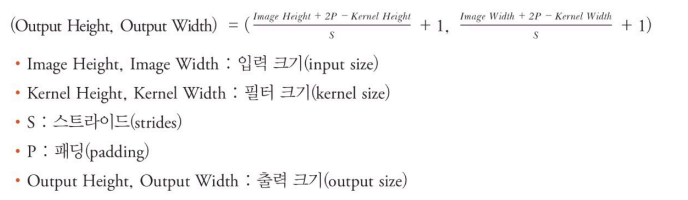


1-7 풀링

추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어. 이미지 축소를 통해 연산량을 감소한다는 점과 과대적합 방지한다는 점이 장점.

- 최대 풀링 : 특징의 큰 값이 다른 특징들을 대표한다는 개념으로 도입. 생각보다 좋은 성능을 발휘하기 때문에 합성곱 신경망과 같이 주로 사용

- 평균 풀링

2) 간단한 모델 생성

2-1. 데이터 로드 및 전처리

In [30]:
# tensorflow 모듈 import
import tensorflow as tf

In [31]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


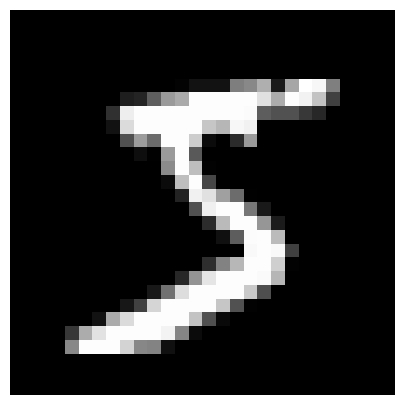

In [32]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis("off")
  plt.show()

plot_image(x_train,0)

In [33]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [34]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [35]:
# 색상 나타내는 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


2-2 Sequential API로 모델 생성 및 학습



In [36]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [37]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2089 - accuracy: 0.9414 - val_loss: 0.0888 - val_accuracy: 0.9736
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0792 - accuracy: 0.9764 - val_loss: 0.0650 - val_accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0603 - accuracy: 0.9825 - val_loss: 0.0598 - val_accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0594 - val_accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.0528 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0356 - accuracy: 0.9893 - val_loss: 0.0589 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0576 -

In [38]:
# 손실과 평가지표 계산

model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0613 - accuracy: 0.9826


[0.0612759031355381, 0.9825999736785889]

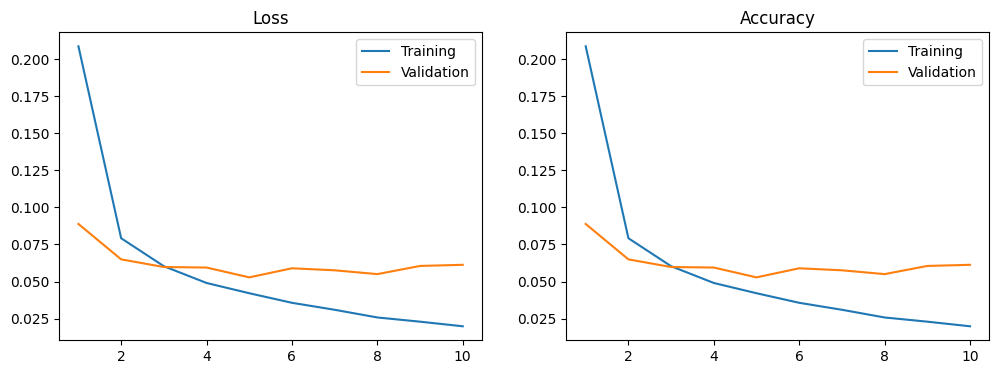

In [39]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

2-3 모델 구조 파악



In [40]:
# 모델 구조
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [42]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>

In [43]:
# 레이어
model.layers

In [44]:
# 첫 번째 레이어 선택
model.layers[0]

In [45]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [46]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [47]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.22475019,  0.20356612,  0.1226078 , -0.6385635 ,
           -0.6608579 , -0.04709399, -0.6391481 ,  0.5841574 ,
            0.32003137,  0.3209231 ,  0.47440097, -0.48385718,
           -0.32873845, -0.4173666 , -0.0181628 , -0.16888975,
           -0.20491661,  0.03869639, -0.9521638 ,  0.2559454 ,
            0.33194336,  0.17400117,  0.12144023, -0.33624846,
            0.24824287, -0.85855573,  0.52521574, -1.0742639 ,
            0.1259689 ,  0.11091619,  0.4561982 , -0.11309911]],
 
         [[-0.22683823,  0.36427087, -0.51222676, -1.0295398 ,
            0.13607755,  0.19253929,  0.23768063,  0.47614354,
           -0.32691818,  0.18808563,  0.239522  , -0.7218565 ,
            0.04187657,  0.30474722,  0.60390294,  0.21911433,
            0.29477736,  0.28486937, -0.8487979 ,  0.2994651 ,
           -0.13409047,  0.11328164,  0.1796344 ,  0.3968914 ,
           -0.04316588,  0.00312881,  0.64

In [48]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.22475019,  0.20356612,  0.1226078 , -0.6385635 ,
          -0.6608579 , -0.04709399, -0.6391481 ,  0.5841574 ,
           0.32003137,  0.3209231 ,  0.47440097, -0.48385718,
          -0.32873845, -0.4173666 , -0.0181628 , -0.16888975,
          -0.20491661,  0.03869639, -0.9521638 ,  0.2559454 ,
           0.33194336,  0.17400117,  0.12144023, -0.33624846,
           0.24824287, -0.85855573,  0.52521574, -1.0742639 ,
           0.1259689 ,  0.11091619,  0.4561982 , -0.11309911]],

        [[-0.22683823,  0.36427087, -0.51222676, -1.0295398 ,
           0.13607755,  0.19253929,  0.23768063,  0.47614354,
          -0.32691818,  0.18808563,  0.239522  , -0.7218565 ,
           0.04187657,  0.30474722,  0.60390294,  0.21911433,
           0.29477736,  0.28486937, -0.8487979 ,  0.2994651 ,
          -0.13409047,  0.11328164,  0.1796344 ,  0.3968914 ,
          -0.04316588,  0.00312881,  0.6469964 , -0.327541

In [49]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-3.1616127e-01, -2.1351941e-01, -2.5758713e-01,  2.6793915e-01,
       -3.7421172e-03, -6.6472732e-02, -1.4197105e-01, -1.1171160e-02,
       -2.2747576e-01, -2.9747567e-01, -5.4099567e-02, -9.0837151e-02,
       -2.6168731e-01, -1.7101242e-01, -2.1256858e-03, -2.2710879e-01,
       -1.4441149e-04, -4.8581921e-02, -2.5271580e-02, -3.0662373e-01,
       -3.3682552e-01, -2.1822532e-01, -2.5874457e-01, -2.4481976e-01,
       -3.0903423e-01, -4.0687855e-02, -1.6652001e-02, -1.0063432e-01,
       -1.5037290e-02, -1.3601711e-01, -3.4818649e-01, -5.9580961e-03],
      dtype=float32)>

In [50]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [51]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 88ms/step


2

In [52]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

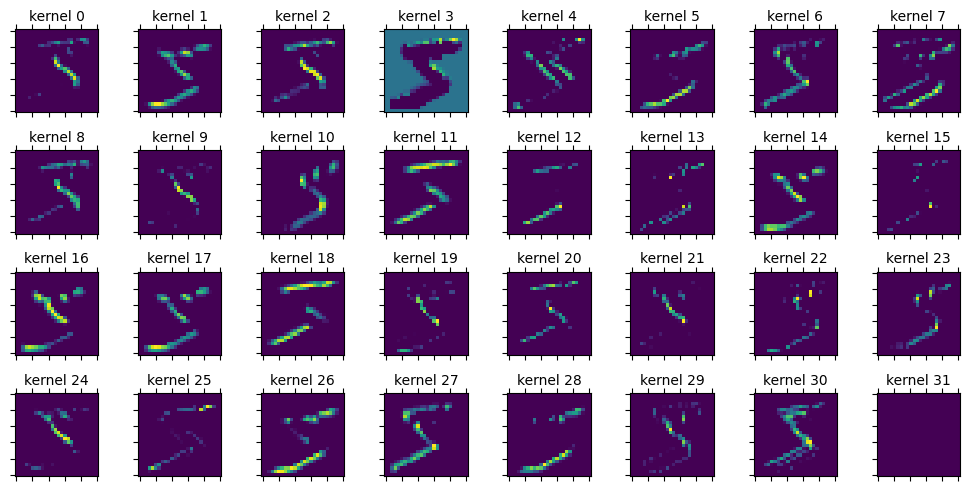

In [53]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [54]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


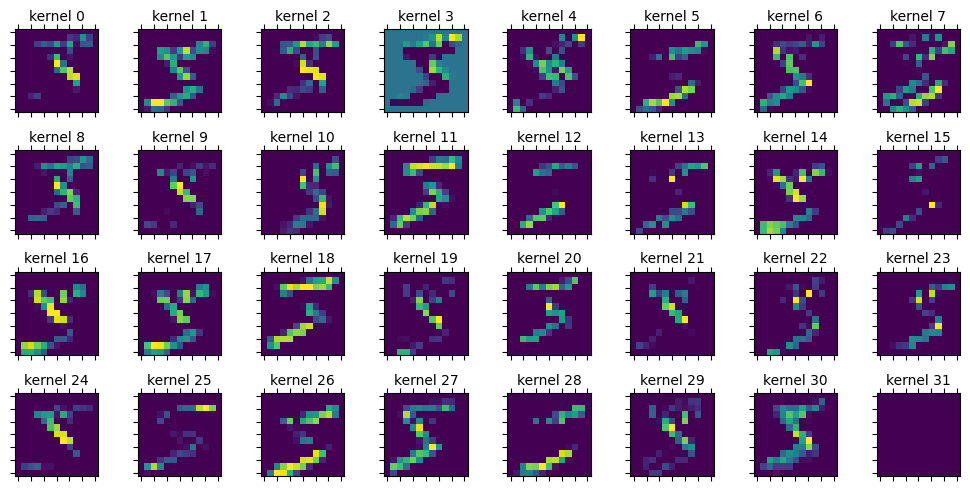

In [55]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

03) 복잡한 모델 생성

3-1. 데이터셋 준비.



In [58]:
import tensorflow as tf
import numpy as np

In [59]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_vaild) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [60]:
# 새로운 출력 값 배열 생성(홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
  if y%2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [61]:
# 원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열을 동시에 출력하여 비교
print(y_train[:10])
print(y_train_odd[:10])

# 홀,짝 여부 정리됨 확인 가능

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [62]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y%2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [64]:
# 정규화(Noramalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)       # 인덱스 -1 : 새로운 축은 끝에 추가
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


3-2 Functional API로 다중 입력, 다중 출력 레이어 생

In [65]:
# Functional API 를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_2 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

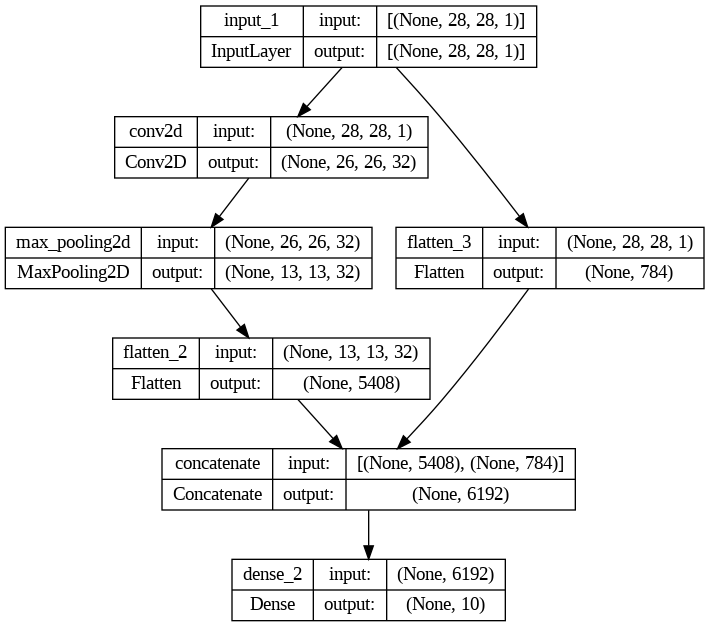

In [68]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='funcional_cnn.png')

In [69]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 1.1170 - accuracy: 0.7453 - val_loss: 0.4818 - val_accuracy: 0.8745
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4231 - accuracy: 0.8806 - val_loss: 0.3570 - val_accuracy: 0.8993
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3530 - accuracy: 0.8964 - val_loss: 0.3227 - val_accuracy: 0.9080
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3279 - accuracy: 0.9039 - val_loss: 0.3046 - val_accuracy: 0.9108
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3141 - accuracy: 0.9078 - val_loss: 0.2955 - val_accuracy: 0.9150
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3051 - accuracy: 0.9103 - val_loss: 0.2888 - val_accuracy: 0.9170
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2980 - accuracy: 0.9132 - val_loss: 0.2845 -

3-3 다중 출력 분류 모델



In [70]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [71]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


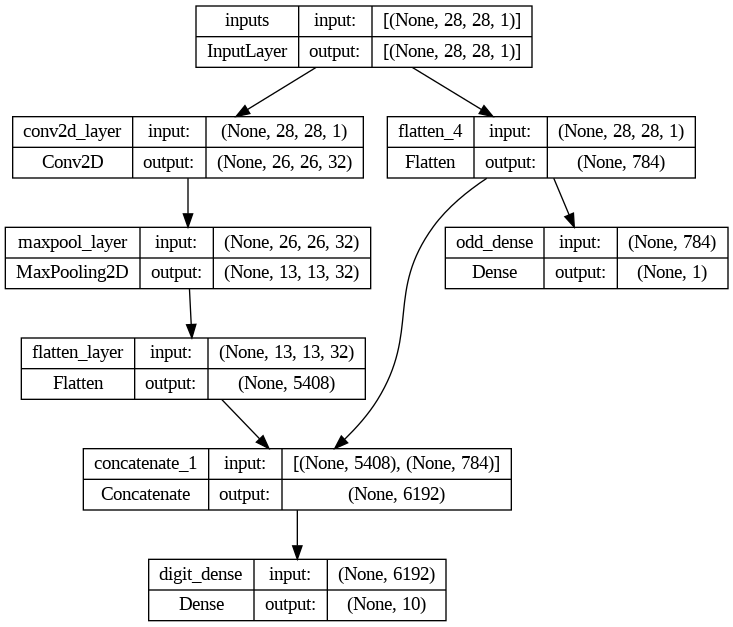

In [72]:
# 모델 구조 그림
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [73]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy',
                    'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 1.3527 - digit_dense_loss: 1.0181 - odd_dense_loss: 0.6694 - digit_dense_accuracy: 0.7528 - odd_dense_accuracy: 0.7796 - val_loss: 0.7535 - val_digit_dense_loss: 0.4308 - val_odd_dense_loss: 0.6455 - val_digit_dense_accuracy: 0.8829 - val_odd_dense_accuracy: 0.7873
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.7045 - digit_dense_loss: 0.3909 - odd_dense_loss: 0.6272 - digit_dense_accuracy: 0.8870 - odd_dense_accuracy: 0.7952 - val_loss: 0.6445 - val_digit_dense_loss: 0.3416 - val_odd_dense_loss: 0.6058 - val_digit_dense_accuracy: 0.9037 - val_odd_dense_accuracy: 0.7967
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.6334 - digit_dense_loss: 0.3376 - odd_dense_loss: 0.5916 - digit_dense_accuracy: 0.9002 - odd_dense_accuracy: 0.8002 - val_loss: 0.5936 - val_digit_dense_loss: 0.3075 - val_odd_dense_loss: 0.5722 - val_digit_dense_accuracy: 0.9127 -

In [74]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.4973 - digit_dense_loss: 0.2763 - odd_dense_loss: 0.4419 - digit_dense_accuracy: 0.9206 - odd_dense_accuracy: 0.8263


[0.49726617336273193,
 0.276297926902771,
 0.44193607568740845,
 0.9205999970436096,
 0.8263000249862671]

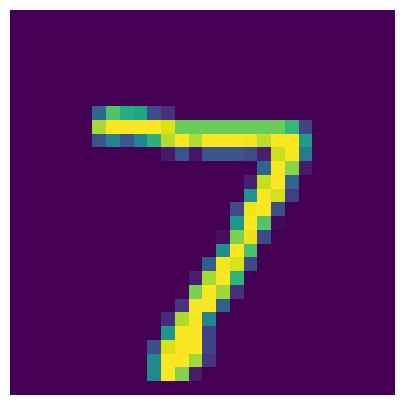

In [75]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5, 5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid, 0)

In [76]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 9ms/step
[1.2803849e-06 2.5759532e-11 1.1483723e-06 6.1368517e-04 7.9458353e-08
 4.0940681e-06 2.8991790e-11 9.9922884e-01 3.6365660e-07 1.5054141e-04]
[0.8231835]


In [77]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [78]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-78-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1])

3-4 전이 학습


In [79]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


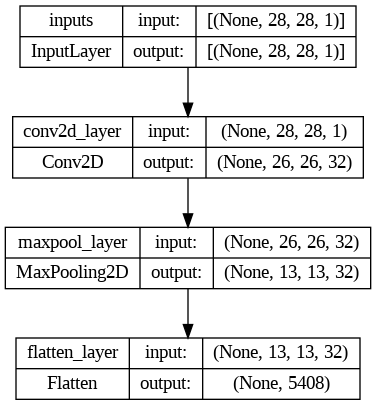

In [81]:
# 모델 구조 시각화
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [82]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
    ])
digit_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


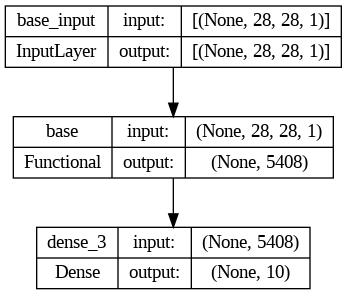

In [83]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [84]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6151 - accuracy: 0.8483 - val_loss: 0.3513 - val_accuracy: 0.9013
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3379 - accuracy: 0.9010 - val_loss: 0.3025 - val_accuracy: 0.9120
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3078 - accuracy: 0.9105 - val_loss: 0.2866 - val_accuracy: 0.9155
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2935 - accuracy: 0.9143 - val_loss: 0.2823 - val_accuracy: 0.9178
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2845 - accuracy: 0.9174 - val_loss: 0.2663 - val_accuracy: 0.9227
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2779 - accuracy: 0.9187 - val_loss: 0.2648 - val_accuracy: 0.9252
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2727 - accuracy: 0.9212 - val_loss: 0.2625 -

In [85]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [86]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [87]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5280 - accuracy: 0.8645 - val_loss: 0.3276 - val_accuracy: 0.9110
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3243 - accuracy: 0.9064 - val_loss: 0.2972 - val_accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2992 - accuracy: 0.9129 - val_loss: 0.2904 - val_accuracy: 0.9163
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2864 - accuracy: 0.9159 - val_loss: 0.2696 - val_accuracy: 0.9217
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2783 - accuracy: 0.9194 - val_loss: 0.2657 - val_accuracy: 0.9232
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2723 - accuracy: 0.9207 - val_loss: 0.2567 - val_accuracy: 0.9259
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2670 - accuracy: 0.9226 - val_loss: 0.2579 - val_

In [88]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [89]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [90]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5253 - accuracy: 0.8648 - val_loss: 0.3284 - val_accuracy: 0.9085
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3239 - accuracy: 0.9064 - val_loss: 0.2972 - val_accuracy: 0.9139
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2990 - accuracy: 0.9131 - val_loss: 0.2771 - val_accuracy: 0.9196
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2862 - accuracy: 0.9162 - val_loss: 0.2748 - val_accuracy: 0.9214
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2779 - accuracy: 0.9193 - val_loss: 0.2686 - val_accuracy: 0.9240
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2720 - accuracy: 0.9207 - val_loss: 0.2632 - val_accuracy: 0.9239
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2666 - accuracy: 0.9230 - val_loss: 0.2596 - val_a